<a href="https://colab.research.google.com/github/Srieswari/crop_recommendation/blob/main/crop_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [213]:
#import necessary libraries

#to read and handle data
import pandas as pd

#visulization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#to preprocess data
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#pipeline and models
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

#metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

#to load model
import pickle


In [214]:
#read the data
data=pd.read_csv('/content/dataset.csv')

In [215]:
data.head(5)

,N,P,K,ph,EC,S,Cu,Fe,Mn,Zn,B,label
0,143,69,217,5.9,0.58,0.23,10.20,116.35,59.96,54.85,21.29,pomegranate
1,170,36,216,5.9,0.15,0.28,15.69,114.20,56.87,31.28,28.62,pomegranate
2,158,66,219,6.8,0.34,0.20,15.29,65.87,51.81,57.12,27.59,pomegranate
3,133,45,207,6.4,0.94,0.21,8.48,103.10,43.81,68.50,47.29,pomegranate
4,132,48,218,6.7,0.54,0.19,5.59,63.40,56.40,46.71,31.04,pomegranate


In [216]:
#check for null values and remove if any
#if there are null values either drop it using dropna or fill any appropriate value like mean,median using fillna
data.isnull().sum()

N        0
P        0
K        0
ph       0
EC       0
S        0
Cu       0
Fe       0
Mn       0
Zn       0
B        0
label    0
dtype: int64

In [217]:
data['label'].value_counts()

pomegranate    104
mango          104
grapes         104
mulberry       104
ragi           104
potato         100
Name: label, dtype: int64

<ipython-input-218-a834feccac00>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


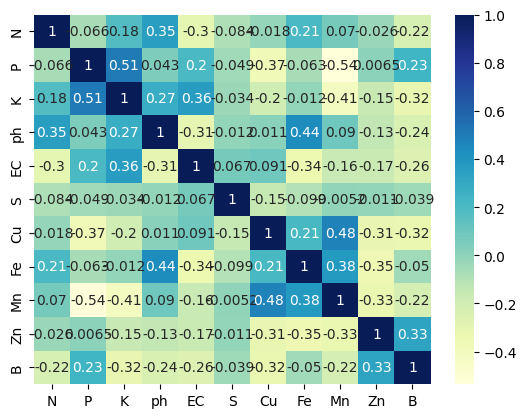

In [218]:
#to find if there is any dependent features
corr=data.corr()
dataplot = sns.heatmap(corr, cmap="YlGnBu", annot=True)

In [219]:
#data is not evenly distributed , so using smote to make in even
oversample = SMOTE()
features, label1 = oversample.fit_resample(data.drop(["label"],axis=1), data.label)

In [220]:
data1

,N,P,K,ph,EC,S,Cu,Fe,Mn,Zn,B
0,143,69,217,5.900000,0.580000,0.230000,10.200000,116.350000,59.960000,54.850000,21.290000
1,170,36,216,5.900000,0.150000,0.280000,15.690000,114.200000,56.870000,31.280000,28.620000
2,158,66,219,6.800000,0.340000,0.200000,15.290000,65.870000,51.810000,57.120000,27.590000
3,133,45,207,6.400000,0.940000,0.210000,8.480000,103.100000,43.810000,68.500000,47.290000
4,132,48,218,6.700000,0.540000,0.190000,5.590000,63.400000,56.400000,46.710000,31.040000
...,...,...,...,...,...,...,...,...,...,...,...
619,129,34,160,4.800000,1.080000,0.088690,25.000000,39.000000,259.930000,33.490000,14.160000
620,61,51,133,5.001600,2.468799,0.102385,27.032003,40.611201,125.383973,44.645886,21.531357
621,132,46,180,4.982553,1.489079,0.112772,15.852989,39.440388,244.353199,28.150291,19.339903
622,154,62,149,5.480257,1.987627,0.094397,24.513184,41.171061,222.876147,43.076688,14.359769


In [221]:
len(label1)

624

In [222]:
#encoding the labels using label encoder
le=LabelEncoder()

In [223]:
le.fit(label1)

LabelEncoder()

In [224]:
labels = le.transform(label1)

In [225]:
# labels2=le.inverse_transform(labels)

0-grapes

1-mango

2-mulberry

3-pomegrante

4-potato

5-ragi

In [226]:
#train_test_splitting
X_train,X_test,y_train,y_test = train_test_split(data1,labels,test_size=0.2,random_state=42,stratify=labels)

In [227]:
#building pipelines with Standardscaler
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
    'nb':make_pipeline(StandardScaler(),GaussianNB())
}

In [228]:
#fitting the model
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

In [185]:
fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())]),
 'nb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gaussiannb', GaussianNB())])}

In [229]:
#comparing the accuracy to choose the best classifier
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print('model-',algo,'accuracy-', accuracy_score(y_test, yhat) ,'precison-', precision_score(y_test,yhat,average="micro")*100 ,'recall', recall_score(y_test,yhat,average="micro")*100 )

model- lr accuracy- 0.96 precison- 96.0 recall 96.0
model- rc accuracy- 0.936 precison- 93.60000000000001 recall 93.60000000000001
model- rf accuracy- 0.96 precison- 96.0 recall 96.0
model- gb accuracy- 0.96 precison- 96.0 recall 96.0
model- nb accuracy- 0.96 precison- 96.0 recall 96.0


In [230]:
#using pickle to dump and get the model back
with open('crop_recommendation.pkl', 'wb') as f:
    pickle.dump(fit_models['nb'], f)

In [231]:
with open('crop_recommendation.pkl', 'rb') as f:
    model = pickle.load(f)

In [232]:
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])

In [233]:
y_pred=model.predict(X_test)

In [234]:
cm=confusion_matrix(y_pred,y_test)


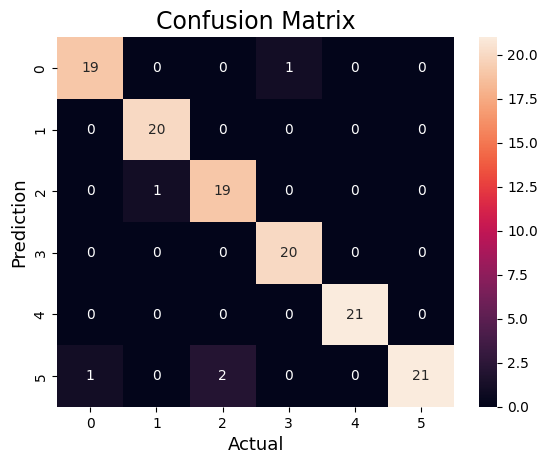

In [235]:
#confusion matrix
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()